In [1]:
import tensorflow as tf
import numpy as np
import importlib.util
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def load_module(path):
    spec = importlib.util.spec_from_file_location("module.name", path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

def load_arch(arch_path):
    arch = load_module(arch_path)
    nn = arch.CNN()

    g = tf.Graph()
    with g.as_default():
        nn.create_architecture()
    return g, nn

In [3]:
graph, nn = load_arch("arch_invariant_a.py")

In [4]:
sess = tf.Session(graph=graph)

In [5]:
sess.run(tf.variables_initializer(graph.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)))

<IPython.core.display.Javascript object>


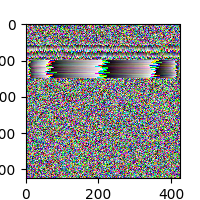

In [6]:
x = np.random.normal(size=(424, 424, 3))
x[50:100, :, :]  = np.sort(x[50:100, :, :], 0)
x[100:150, :, :] = np.sort(x[100:150, :, :], 1)
x[150:200, :, :] = np.sort(x[150:200, :, :], 2)
plt.figure(figsize=(2,2))
plt.imshow(x)

In [7]:
def dihedral(x, i):
    x = x.copy()
    if i & 4:
        x = np.transpose(x, (1, 0, 2))  # tau[4]
    if i & 1:
        x = x[:, ::-1, :]  # tau[1]
    if i & 2:
        x = x[::-1, :, :]  # tau[2]
    return x

In [8]:
xs = np.array([dihedral(x, i) for i in range(8)])

In [9]:
ps = sess.run(nn.tfp, feed_dict={nn.tfx: xs})
print(np.transpose(ps))

[[  8.18447471e-02   8.18455964e-02   8.18436071e-02   8.18446428e-02
    8.18450004e-02   8.18445012e-02   8.18451643e-02   8.18444341e-02]
 [  9.05963838e-01   9.05963063e-01   9.05965090e-01   9.05964136e-01
    9.05963600e-01   9.05964196e-01   9.05963302e-01   9.05964196e-01]
 [  1.21914120e-02   1.21914251e-02   1.21913245e-02   1.21913115e-02
    1.21913394e-02   1.21913003e-02   1.21915331e-02   1.21913878e-02]
 [  8.96741867e-01   8.96741092e-01   8.96743119e-01   8.96742165e-01
    8.96741748e-01   8.96742344e-01   8.96741271e-01   8.96742344e-01]
 [  9.22193937e-03   9.22190398e-03   9.22195148e-03   9.22192447e-03
    9.22188442e-03   9.22183879e-03   9.22202878e-03   9.22182575e-03]
 [  2.12004925e-05   2.12002797e-05   2.12006616e-05   2.12003270e-05
    2.12000814e-05   2.11999668e-05   2.12008199e-05   2.12001705e-05]
 [  9.20073874e-03   9.20070428e-03   9.20075085e-03   9.20072384e-03
    9.20068473e-03   9.20063909e-03   9.20082815e-03   9.20062605e-03]
 [  6.4145232

In [10]:
test = sess.run(nn.test, feed_dict={nn.tfx: xs})
test = np.reshape(test, (8, 8, -1))

<IPython.core.display.Javascript object>


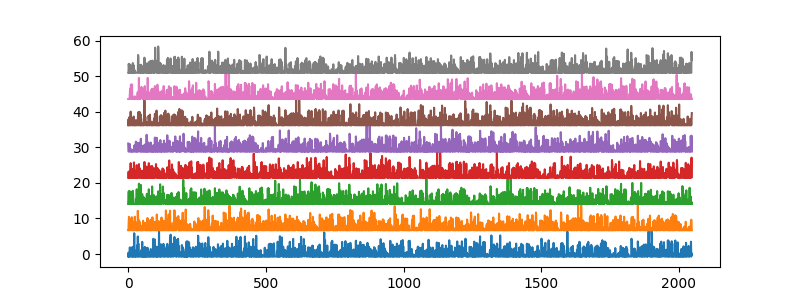

<IPython.core.display.Javascript object>


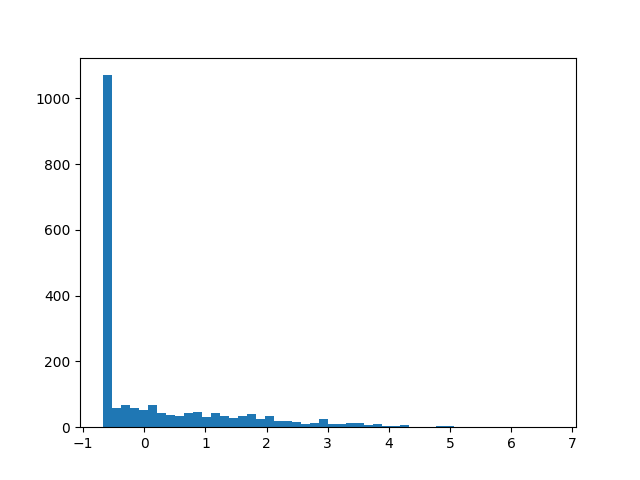

(0.19532774, 1.3008777)

In [17]:
step = test[0].max() - test[0].min()
plt.figure(figsize=(8,3))
for i in range(8):
    plt.plot(test[i].flatten() + step * i)

plt.figure()
plt.hist(test[0].flatten(), bins=50)

test[0].flatten().mean(), test[0].flatten().std()

<IPython.core.display.Javascript object>


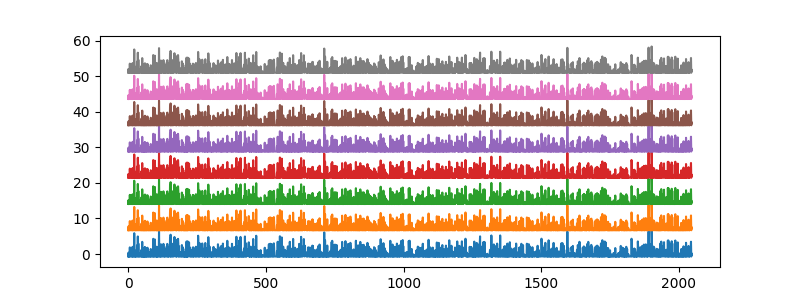

In [12]:
mt = np.array([ [0, 1, 2, 3, 4, 5, 6, 7], [1, 0, 3, 2, 5, 4, 7, 6],
                [2, 3, 0, 1, 6, 7, 4, 5], [3, 2, 1, 0, 7, 6, 5, 4],
                [4, 6, 5, 7, 0, 2, 1, 3], [5, 7, 4, 6, 1, 3, 0, 2],
                [6, 4, 7, 5, 2, 0, 3, 1], [7, 5, 6, 4, 3, 1, 2, 0]])
# tau[mt[a,b]] = tau[a] o tau[b]

iv = np.array([0, 1, 2, 3, 4, 6, 5, 7])
# tau[iv[a]] is the inverse of tau[a]

plt.figure(figsize=(8,3))
for i in range(8):
    plt.plot(test[i][mt[i]].flatten() + step * i)